# The Census Project

This project is based on a census data of a small town located between two mega cities. The requirement is to use the data to make recommendation on what should be built on an unoccupied plot of land.

We would use this notebook to explore the data and provide visualizations to aid analysis, interpretations and recommendations.

First, We are going to import the libraries needed and read in the csv census data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#import pandas_profiling as pp
#import sweetviz as sv
import statistics as stat

In [4]:
census = pd.read_csv("census_01.csv")

# Overview of the Census Data
An overview of the census data shows us the number of rows and columns contain in the file

In [5]:
census

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Renaissance Lane,Grace,Johnston,29,Head,Single,Female,Visual merchandiser,None,Methodist
1,1,Renaissance Lane,Brett,Sheppard,31,Partner,Single,Male,Biomedical engineer,None,Methodist
2,1,Renaissance Lane,Mark,Johnston,6,Son,NaN,Male,Student,None,NaN
3,1,Renaissance Lane,Teresa,Johnston,3,Daughter,NaN,Female,Child,None,NaN
4,2,Renaissance Lane,Helen,Smith,81,Head,Married,Female,Retired Primary school teacher,None,Christian
...,...,...,...,...,...,...,...,...,...,...,...
11113,1,Racoon Hall,Tracey,Gregory,12,Granddaughter,NaN,Female,Student,None,NaN
11114,1,Racoon Hall,Nigel,Macdonald,8,Grandson,NaN,Male,Student,None,NaN
11115,1,Racoon Hall,Natalie,Francis,1,Granddaughter,NaN,Female,Child,None,NaN
11116,1,Racoon Hall,Roger,Leach,54,Lodger,Single,Male,Commercial horticulturist,None,Methodist


# Data Cleaning

From this point, we would begin to explore the data to enusre it is suitable for analysis. Errors observed in the data would be dealt with to ensure it doesn't affect analysis.

In [6]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11118 entries, 0 to 11117
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   11115 non-null  object
 1   Street                         11117 non-null  object
 2   First Name                     11116 non-null  object
 3   Surname                        11117 non-null  object
 4   Age                            11118 non-null  object
 5   Relationship to Head of House  11118 non-null  object
 6   Marital Status                 8354 non-null   object
 7   Gender                         11116 non-null  object
 8   Occupation                     11118 non-null  object
 9   Infirmity                      11118 non-null  object
 10  Religion                       8294 non-null   object
dtypes: object(11)
memory usage: 955.6+ KB


In [7]:
#pp.ProfileReport(census) #to display the report

In [8]:
#my_report = sv.analyze(census)
#my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

# Dealing with Spaces


Spaces observed in the data set were not captured as null values when checking for null values, these are categorized as non standard misisng data and were handled by reading the data in with na_values

In [9]:
missing_data = [" ", "  ", ""]
census = pd.read_csv("census_01.csv", na_values=missing_data) # to read in the spaces as null values

# Cleaning Age Column

1. it is observed we have ages captured as words
2. We have missing values in this age column, which have been assigned 17years
3. Ages written as decimal numbers were rounded off
4. Ages captured as negative values were converted to positive values.
5. Age is in strings format which were changed to integers
6. A person has lied about their age to be 150 when the oldest known human in recent times have said to be 122. This was corrected to 50 years. This is based on the fact he is still employed, 50 is close to the average age of those in same occupation as him, the age of the son who is 32 and 150 could be a typo for 150 years.

In [10]:
census["Age"].unique() # gives the unique values in the Age column

array(['29', '31', '6', '3', '81', '83', '54', '56', '71', '20', '19',
       '46', '44', '18', '14', '62', '70', '51', '49', '17', '47', '25',
       '23', '32', '33', '35', '11', '77', '43', '58', '57', '40', '37',
       '64', '75', '61', '59', '45', '42', '13', '27', '21', '104', '41',
       '38', '36', '34', '26', '55', '48', '15', '60', '4', '1', '72',
       '65', '52', '2', '12', '8', '53', '9', '66', '68', '63', '22',
       '73', '78', '39', '5', '24', '10', '86', '82', '80', '28', '30',
       '16', '7', '76', '0', '85', '50', '74', '69', '84', '92', '67',
       '89', '88', '94', '99', '79', '87', '105', '82.67482093',
       '85.67482093', '93', '20.3', 'nineteen', '101', '98', '150', '-1',
       '65.94133739', '66.94133739', '0.5', '103', '96', '95', nan, '91',
       '97', '90', '65.54297878', '61.54297878', '66.6', '108', 'fifteen'],
      dtype=object)

In [11]:
#returns all rows shaving the specified values.
census[(census["Age"]=="nineteen" ) |(census["Age"]=="-1")|(census["Age"]=="fifteen")|(census["Age"].isnull())]


,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3327,62,Railwaycharm Street,Donna,Hill,nineteen,Head,Single,Female,University Student,None,None
3905,63,White Cliffs,Billy,Wood,-1,Son,NaN,Male,Child,None,NaN
5044,34,Oyster Valley,Clive,Bennett-Andrews,NaN,Son,NaN,Male,Student,None,NaN
10305,9,Griffiths Drive,Denise,Tucker,fifteen,Granddaughter,NaN,Female,Student,None,NaN


Using indexing to change values

the values veing changed here are based on assumption that they were wrongly captured  in words and negative values

In [12]:
census.loc[[3327,3905,10305,5044],"Age"] =["19","1","15","17"] #this uses the index and changes them to the items in the list.

The Nan value was changed to 17 years because he is classified as a student. In this data, you have to be 18 to be classified as a university student.

In [13]:
census[(census["Street"]=="Oyster Valley") & (census["House Number"]=="34")] #to get all the rows having  house number column as 34 and street as Oyster Valley

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5042,34,Oyster Valley,Gillian,Bennett-Andrews,49,Head,Single,Female,"Psychotherapist, dance movement",None,Catholic
5043,34,Oyster Valley,Martyn,Hyde,55,Partner,Single,Male,Medical sales representative,None,Catholic
5044,34,Oyster Valley,Clive,Bennett-Andrews,17,Son,NaN,Male,Student,None,NaN


In [14]:
#Changing the age column type to integers
census["Age"]= census["Age"].astype("float").astype("int")

In [15]:
census["Age"].describe() #generates the statistics of the Age column

count    11118.000000
mean        35.090034
std         21.263386
min          0.000000
25%         18.000000
50%         34.000000
75%         50.000000
max        150.000000
Name: Age, dtype: float64

In [16]:
census[census["Age"]==150] # to call the row where Age column is 150years

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3829,41,White Cliffs,Jamie,Ashton,150,Head,Married,Male,"Scientist, audiological",None,Christian


In [17]:
census[(census["Street"]=="White Cliffs") & (census["House Number"]=="41")] #to get all rows of house number 42 and street white cliffs

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3829,41,White Cliffs,Jamie,Ashton,150,Head,Married,Male,"Scientist, audiological",None,Christian
3830,41,White Cliffs,Ashleigh,Ashton,60,Wife,Married,Female,Pathologist,None,Christian
3831,41,White Cliffs,Elliot,Barnes-Ashton,32,Son,Divorced,Male,Herbalist,None,Christian


In [18]:
census[census["Occupation"]=="Scientist, audiological"] # getting all rows where the occupation column is Scientist,audiological

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
705,12,Clark Islands,Judith,Edwards-Bolton,28,Daughter,Single,Female,"Scientist, audiological",Physical Disability,None
1441,25,Hull Road,Jeremy,Clarke,37,Husband,Married,Male,"Scientist, audiological",None,Methodist
3829,41,White Cliffs,Jamie,Ashton,150,Head,Married,Male,"Scientist, audiological",None,Christian
3934,73,White Cliffs,Charlie,Pearson,35,Head,Single,Male,"Scientist, audiological",None,Catholic
4515,14,Armaghfast Lane,Anna,O'Connor,23,Head,Married,Female,"Scientist, audiological",None,None
6024,66,Guitar Greens,Kim,Evans,50,Head,Married,Female,"Scientist, audiological",None,Christian
6109,89,Guitar Greens,Natalie,Morrison,39,Head,Married,Female,"Scientist, audiological",None,Catholic
7860,43,Panther Street,George,Davison,36,Son,Single,Male,"Scientist, audiological",None,Christian
8471,34,Stevenson Lodge,Frederick,Ross,27,Son,Divorced,Male,"Scientist, audiological",None,Methodist
9415,3,Albanspay Road,Samantha,Davis,55,Head,Married,Female,"Scientist, audiological",None,None


In [19]:
census.loc[3829,"Age"]=50 #using row indexing method to change age from 150 to 50 years

# Cleaning Gender column

1. gender was recorded in multiple formats which would be converted to Male and Female because as at 1881, those were the only recognised genders.
2. nan type were decided by the names of the persons as there are generally accpeted female names and male names

In [20]:
census["Gender"].unique() #generates unique values in the Gender column

array(['Female', 'Male', 'M', 'FEMALE', 'MALE', 'F', nan], dtype=object)

In [21]:
values_to_replace= {"M":"Male","MALE":"Male","F":"Female","FEMALE":"Female"} #a dictionary of changes to be made
census["Gender"].replace(values_to_replace, inplace=True)  #replacing the values under gender column and using inplace to make the changes permanent

In [22]:
census[census["Gender"].isnull()] #to get all rows with the null values under gender column

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3298,54,Railwaycharm Street,Leonard,Mahmood,38,Husband,Married,NaN,Risk manager,None,Catholic
7330,17,Payne Square,Victoria,James,37,Head,Married,NaN,"Solicitor, Scotland",None,Christian
7743,25,Panther Street,Nigel,Fisher,35,Adopted Son,Divorced,NaN,Corporate investment banker,None,Christian


In [23]:
census.loc[[3298,7330,7743], "Gender"] = ["Male","Female","Male"] #using indexing to replace all null values under Gender column

# Relationship to Head of House
1.There is a missing record in this column which was replaced by Head, as the person is married and lives with her husband. 2.wife wasn't used as in this data Head is used for partner of husband/wife.

In [24]:
census[census["Relationship to Head of House"].isnull()] # to get the row having null values under relationship to head of house

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4801,6,Clarke Lake,Mary,Roberts,37,NaN,Married,Female,Radio broadcast assistant,None,Catholic


In [25]:
census[(census["Street"]=="Clarke Lake") & (census["House Number"]=="6")] # calls all rows having Clarke lake under Street column and 6 under house number

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4801,6,Clarke Lake,Mary,Roberts,37,NaN,Married,Female,Radio broadcast assistant,None,Catholic
4802,6,Clarke Lake,George,Roberts,39,Husband,Married,Male,Futures trader,None,None


In [26]:
census.loc[4801,"Relationship to Head of House"] ="Head" #using row indexing to change Nan value to "head"

# Marital Status
1. Marital Status were filled with S,M,W for Single Married, Widowed respectively. This has been replaced appropriately.
2. There were missing values which needs to be replaced.
3. There is a lot null values in this column. those below 16years were changed to "Never married" as the legal age for marriage in the Uk is 16years. Source:https://census.gov.uk/help/how-to-answer-questions/paper-questions-help/on-21-march-2021-what-is-your-legal-marital-or-registered-civil-partnership-status
4. Persons who have null marital status and are above 18 years, living alone or living with parents and siblings were classified as single.
5. Peope with ages between 16-17 where the relationship to head of house is not Head, is head but lives alone, were also classified as single.

In [27]:
census["Marital Status"].unique() #returns unique values under marital status

array(['Single', nan, 'Married', 'Widowed', 'Divorced', 'S', 'M', 'W'],
      dtype=object)

In [28]:
value_to_replace= {"M":"Married","S":"Single","W":"Widowed"} #dictionary of what to be replaced
census["Marital Status"].replace(value_to_replace, inplace=True) #using .replace() to effect the changes permanently using inplace.

In [29]:
under16= (census.Age<16)
census.loc[under16, "Marital Status"] = "Never Married" #to change marital status column where age is less than 16

In [30]:
census["Marital Status"].replace(np.nan, "Single", inplace=True) #to change remaining nan values for those above 16 to Single

# House Number

1. Missing House number was gotten by checking for familes who live in same address

In [31]:
census[census["House Number"].isnull()]# returns all null valkues under House number column

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6,NaN,Renaissance Lane,Hazel,Richards,54,Head,Married,Female,Housing manager/officer,None,None
87,NaN,Owen Inlet,Kevin,Phillips,45,Head,Divorced,Male,Data scientist,None,Methodist
5849,NaN,Guitar Greens,Megan,Daniels,45,Head,Married,Female,"Teacher, secondary school",None,Christian
8690,NaN,Sharkwash Road,Jeremy,Osborne,21,Head,Single,Male,University Student,None,Muslim


In [32]:
census.loc[[6,87,5849,7571,8690],"House Number"] = ["3","14","21","2","81"] #to change value of multiple rows under House Number

# Street Column

In [33]:
census["Street"].isnull().sum() #returns the number of null values under Street column

1

In [34]:
census[census["Street"].isna()] #to print out the row having error under street column name

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
9923,108,NaN,Derek,Martin,35,Husband,Married,Male,Volunteer coordinator,None,Catholic


In [35]:
census.loc[[9923],"Street"] = ["Mahogany Shore"] #using indexing to change the Nan values

# Surname

In [36]:
census[census["Surname"].isna()] #returns the rows with null values under surname column

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1067,15,Humphreys Circles,Robin,NaN,14,Son,Never Married,Male,Student,None,NaN
4274,32,Charity Road,Jacqueline,NaN,10,Daughter,Never Married,Female,Student,None,NaN
6633,52,Testament Street,Colin,NaN,48,Husband,Married,Male,"Programmer, applications",None,None
8542,54,Stevenson Lodge,Kathryn,NaN,16,Daughter,Single,Female,Student,None,NaN
8653,59,Sharkwash Road,Julian,NaN,70,Head,Widowed,Male,Retired Artist,None,Catholic


In [37]:
census[(census["House Number"]== "32") & (census["Street"]== "Charity Road")] #returns all rows with house number 32 and Charity road

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4272,32,Charity Road,Janet,Hall,44,Head,Married,Female,Retail manager,None,None
4273,32,Charity Road,Carl,Hall,44,Husband,Married,Male,Agricultural engineer,None,None
4274,32,Charity Road,Jacqueline,NaN,10,Daughter,Never Married,Female,Student,None,NaN
4275,32,Charity Road,Geoffrey,Daly,9,Son,Never Married,Male,Student,None,NaN


In [38]:
census.loc[4274,"Surname"] = ["Daly"] #using indexing to change the Null value

In [39]:
census[(census["Street"]== "Humphreys Circles") & (census["House Number"]=="15")]#returns all rows with house number 15 and Humphrreys circles

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
1065,15,Humphreys Circles,Abigail,Gordon,40,Head,Divorced,Female,Homeopath,None,None
1066,15,Humphreys Circles,Rachel,Gordon,15,Daughter,Never Married,Female,Student,None,NaN
1067,15,Humphreys Circles,Robin,NaN,14,Son,Never Married,Male,Student,None,NaN
1068,15,Humphreys Circles,Glenn,Gordon,8,Son,Never Married,Male,Student,None,NaN


In [40]:
census.loc[[1067],"Surname"] = ["Gordon"] #Using indexing to change the values under surname to gordon

In [41]:
census[(census["Street"]== "Testament Street") & (census["House Number"]=="52")]#returns all rows with house number 52 and Testament Street

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
6632,52,Testament Street,Deborah,Patterson,48,Head,Married,Female,"Civil engineer, consulting",None,None
6633,52,Testament Street,Colin,NaN,48,Husband,Married,Male,"Programmer, applications",None,None
6634,52,Testament Street,Richard,Patterson,15,Son,Never Married,Male,Student,None,NaN
6635,52,Testament Street,Melanie,Patterson,12,Daughter,Never Married,Female,Student,None,NaN


In [42]:
census.loc[[6633],"Surname"] = ["Patterson"] # to fill in missing surname as patterson

In [43]:
census[(census["Street"]== "Stevenson Lodge") & (census["House Number"]=="54")]#returns all rows with house number 54 and Stevenson lodge

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8539,54,Stevenson Lodge,Pamela,Perry,47,Head,Married,Female,Optometrist,None,None
8540,54,Stevenson Lodge,Eric,Perry,50,Husband,Married,Male,Cytogeneticist,None,None
8541,54,Stevenson Lodge,Chloe,Perry,18,Daughter,Single,Female,Student,None,None
8542,54,Stevenson Lodge,Kathryn,NaN,16,Daughter,Single,Female,Student,None,NaN


In [44]:
census.loc[[8542],"Surname"] = ["Perry"] # to fill in missing surname for Kathryn

In [45]:
census[(census["Street"]== "Sharkwash Road") & (census["House Number"]=="59")]#returns all rows with house number 59 and Sharkwash Road

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
8653,59,Sharkwash Road,Julian,NaN,70,Head,Widowed,Male,Retired Artist,None,Catholic


In [46]:
census.loc[8653, "Surname"]= "Unknown" #to assign unknown to missing  data

# First Name

In [47]:
census[census["First Name"].isnull()] #gives all the null values under First name column

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5706,16,White Way,NaN,Charlotte Harris,30,Daughter,Divorced,Female,Acupuncturist,None,Christian
6976,2,Kemp Club,NaN,Turner,68,Head,Married,Male,Retired Public relations officer,None,Christian


In [48]:
census[(census["Street"]== "White Way") & (census["House Number"]=="16")]#returns all rows with house number 16 and White way

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5704,16,White Way,Samantha,Harris,50,Head,Married,Female,"Surveyor, mining",None,Christian
5705,16,White Way,Billy,Harris,55,Husband,Married,Male,Museum education officer,None,Christian
5706,16,White Way,NaN,Charlotte Harris,30,Daughter,Divorced,Female,Acupuncturist,None,Christian


In [49]:
#using row indexing to correct  First name and surname
census.loc[5706,"First Name"]="Charlotte"
census.loc[5706,"Surname"]="Harris"

In [50]:
census.loc[6976, "First Name"]= "Unknown" #to assign unknown to missing First name data

# Occupation

In [51]:
census[census["Occupation"].isnull()] #calling the null values under occupation

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7825,38,Panther Street,Jane,Hill,26,Daughter,Single,Female,NaN,None,Christian


In [52]:
#assigning Unemployed to the missing value
census.loc[7825,"Occupation"]="Unemployed"

In [53]:
#to change those above the retirement age listed as unemployed to retired
census.loc[(census.Age>70) & (census.Occupation=="Unemployed"), "Occupation"] = "Retired"


# Infirmity

In [54]:
census[census["Infirmity"].isnull()] # calling the null values under infirmity column

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
392,7,Hope Trace,Howard,Bell,3,Son,Never Married,Male,Child,NaN,NaN
2354,10,Windsor Drive,Gemma,Price,36,None,Single,Female,Physiological scientist,NaN,Catholic
3082,44,Smith Ville,June,Clark,53,Wife,Married,Female,Printmaker,NaN,Christian
4319,47,Charity Road,Victoria,James,81,Wife,Married,Female,Retired Charity fundraiser,NaN,Catholic
5229,92,Oyster Valley,Eric,Murray,62,None,Single,Male,"Radiographer, diagnostic",NaN,Christian
6267,14,Bryant Drive,Victoria,Edwards,52,Adopted Daughter,Divorced,Female,"Scientist, water quality",NaN,None
6777,59,CherryChestnut Parkway,Maurice,Lawrence,52,Husband,Married,Male,"Chemist, analytical",NaN,Catholic
8122,42,Candlestick Locks,Shaun,O'Sullivan,20,None,Single,Male,University Student,NaN,None
9848,81,Mahogany Shore,Amber,Cooper,58,Head,Single,Female,"Teacher, early years/pre",NaN,Methodist


In [55]:
census["Infirmity"].replace({np.nan:"None","Female":"None"}, inplace= True) #replacing the null values with "None"

# Religion
1. All people below 18 years has null values for religion and were assigned None vale as there was no way to confirm transmission of religion from parents to children.

2. Those above 18 Years with null values were also converted to None,
3. Religions with few adherence were also concerted to "None"
4. Erroneous entries were converted to none value

In [56]:
census["Religion"].isnull().sum() # to ge the totla number of null values

2826

In [57]:
census["Religion"].unique()# to get all unique entries in the religion column

array(['Methodist', nan, 'Christian', 'None', 'Sikh', 'Catholic',
       'Muslim', 'Jewish', 'Agnostic', 'Hindu', 'Undecided', 'Buddist',
       'Nope', 'Female', 'Pagan', 'Jedi'], dtype=object)

In [58]:
#to convert all the null entries, erroneous entries,and few adherence to none
values_to_replace1= {np.nan:"None","Undecided":"None","Female":"None","Jedi":"None","Pagan":"None","Agnostic":"None", "Hindu":"None", "Buddist":"None", "Sikh":"None","Jewish":"None","Nope":"None"}
census["Religion"].replace(values_to_replace1, inplace=True)

In [60]:
#my_report = sv.analyze(census)
#my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [61]:
#https://newbedev.com/python-new-column-with-age-group-pandas-code-example
#to create and Agegroup for the ages
age=census["Age"].tolist()#converting dataframe to a list
census_agegroup= pd.DataFrame({"Age":age})
bins= [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,101]
labels = ["0-4","5-9","10-14","15-19","20-24","25-29","30-34","35-39","40-44","45-49","50-54","55-59","60-64","65-69","70-74","75-79","80-84","85-89","90-94","95-99","100+"]
census_agegroup['AgeGroup'] = pd.cut(census_agegroup['Age'], bins=bins, labels=labels, right=False) #to segment and sort the data into bins
census_agegroup["AgeGroup"].astype("object") #to convert the categorical type to object type
census_agegroup

,Age,AgeGroup
0,29,25-29
1,31,30-34
2,6,5-9
3,3,0-4
4,81,80-84
...,...,...
11113,12,10-14
11114,8,5-9
11115,1,0-4
11116,54,50-54


#### To Create a column for employment

In [62]:
Employment=[]

#for loop to check the various entries in occupation column and classify them as retired,Student(child),Student,
#Employed, unemployed and assigns them to the empty Employment list.

for x in census["Occupation"]:
    if x[0:7]=="Retired":
        Employment.append("Retired")
    elif x=="Student" or x == "Child":
        Employment.append("Student(Child)")
    elif x=="University Student" or x == "PhD Student":
        Employment.append("Student")
    elif x=="Unemployed":
        Employment.append("Unemployed")
    else:
        Employment.append("Employed")
Employment = {"Employment":Employment} # creating a key and value for employment using the string and list 

census_employment = pd.DataFrame(Employment) #creating a dataframe for employment 

census=pd.concat([census, census_agegroup["AgeGroup"],census_employment],axis=1) #adding the new dataframe column column to existing census dataalong the columns

# Exploratory Data Analysis and visualizations

In [63]:
sns.set_style("darkgrid") #to set the style of the background for graphs to grid with dark color

Text(0.5, 1.0, 'Plot Showing Age Distribution of Males and Females')

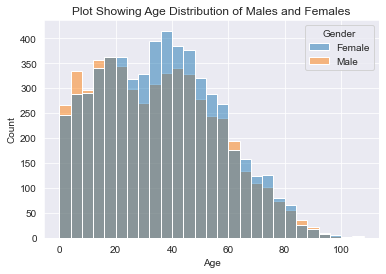

In [64]:
sns.histplot(census, x="Age", binwidth=4, hue="Gender")
plt.title("Plot Showing Age Distribution of Males and Females")

In [65]:
Male_Ages= census[census["Gender"]=="Male"] #creating a table for male only
Female_Ages= census[census["Gender"]=="Female"] #creating a table for female only

Text(0.5, 1.0, 'Plot Showing Distribution of the Male Ages')

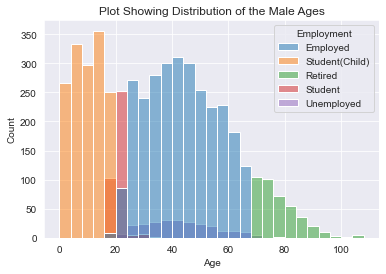

In [66]:
#Plot for Male ages
sns.histplot(Male_Ages, x="Age", binwidth=4, hue="Employment")
plt.title("Plot Showing Distribution of the Male Ages")


Text(0.5, 1.0, 'Plot Showing Distribution of the Female Ages')

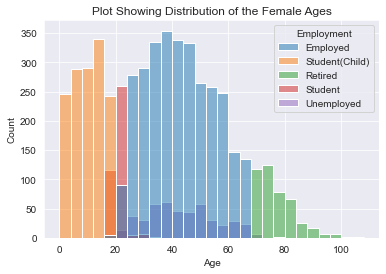

In [67]:
#Plot for female ages
sns.histplot(Female_Ages, x= "Age", binwidth=4, hue="Employment")
plt.title("Plot Showing Distribution of the Female Ages")

In [68]:
male_ages=Male_Ages["Age"].to_frame().reset_index()
female_ages=Female_Ages["Age"].to_frame().reset_index()

# Age Pyramid

In [69]:
def age_range_builder(census, gender, start_age, end_age):
    """Function that returns the number of people of a gender in an age range"""
    return census[(census["Gender"]==gender) & (census["Age"] >= start_age)&(census["Age"] <= end_age)].count()["Gender"]

In [70]:
#https://www.statology.org/population-pyramid-python/
Age_range= ["100+","95-99","90-94","85-89","80-84","75-79","70-74","65-69","60-64","55-59","50-54","45-49","40-44","35-39","30-34","25-29","20-24","15-19","10-14","5-9","0-4"]

male = []
female = []
count = []

for value in Age_range:
    start=0
    end=0
    if "-" in value:
        age=value.split("-")
        start = int(age[0])
        end = int(age[1])
    else:
        start = 100
        end = 200
    
    male.append(-1*age_range_builder(census, "Male", start, end))
    female.append(age_range_builder(census, "Female", start, end))
    count.append((age_range_builder(census, "Male", start, end)) + (age_range_builder(census, "Female", start, end)))    


agegroup_table = pd.DataFrame({"Age":Age_range,"Male":male, "Female": female, "Count": count})

AgeClass= ["100+","95-99","90-94","85-89","80-84","75-79","70-74","65-69","60-64","55-59","50-54","45-49","40-44","35-39","30-34","25-29","20-24","15-19","10-14","5-9","0-4"]

agegroup_table

,Age,Male,Female,Count
0,100+,-6,4,10
1,95-99,-4,6,10
2,90-94,-12,10,22
3,85-89,-42,31,73
4,80-84,-66,75,141
5,75-79,-97,98,195
6,70-74,-136,157,293
7,65-69,-147,180,327
8,60-64,-231,226,457
9,55-59,-306,332,638


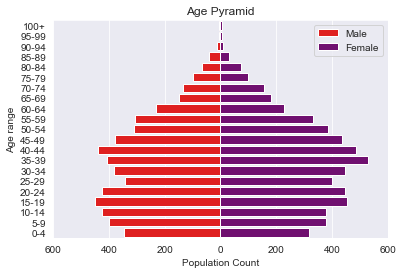

In [71]:
age_pyramid = sns.barplot(x='Male', y='Age', data=agegroup_table, order=AgeClass,
color=('red'), label='Male',)

age_pyramid = sns.barplot(x='Female', y='Age', data=agegroup_table, order=AgeClass,
color=('purple'), label='Female')

age_pyramid.legend()
age_pyramid.set_xlabel("Population Count")
age_pyramid.set_ylabel("Age range")
plt.title('Age Pyramid')
xticks = plt.gca().get_xticks().astype(int)
plt.xticks(xticks, labels=np.abs(xticks));


# Employment 

Text(0.5, 1.0, 'A plot of Age against Employment')

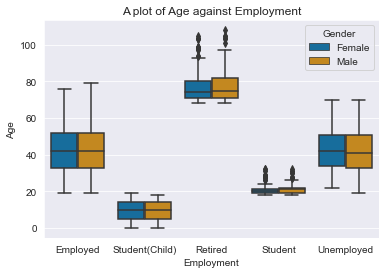

In [72]:
#creating a boxplot of Age against employment conditioned by gender
sns.boxplot(x="Employment", y= "Age", data=census,hue = "Gender", palette="colorblind")
plt.title("A plot of Age against Employment")

Text(0.5, 1.0, 'A plot of Employment Against Age')

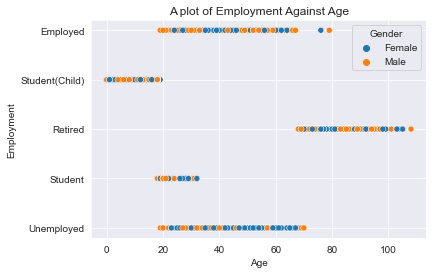

In [73]:
#A scatter plot of Employment against Age conditioned by Gender
sns.scatterplot(data=census, x='Age', y='Employment', hue="Gender")
plt.title("A plot of Employment Against Age")

Text(0.5, 1.0, 'An Employment Histogram')

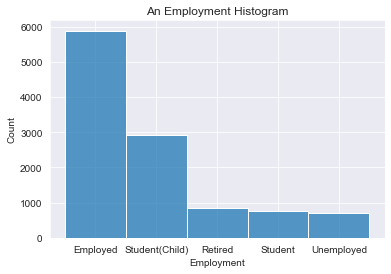

In [74]:
#A histogram plot of employment
sns.histplot(census, x="Employment", binwidth=4)
plt.title("An Employment Histogram")

# Divorce and Marriage

Text(0.5, 1.0, 'A plot of Marital Status Against Age')

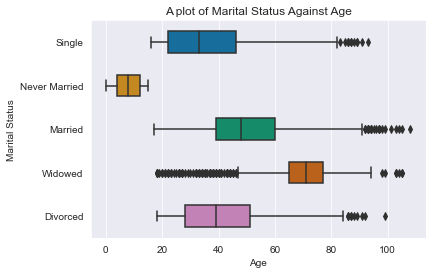

In [75]:
#A boxplot of Marital Status Against age
sns.boxplot(y="Marital Status", x= "Age", data=census, width=0.5, palette="colorblind")
plt.title("A plot of Marital Status Against Age")

In [76]:
#to calculate crude divorce rate and marriage rate
divorcees = census[census["Marital Status"]=="Divorced"].count()["Marital Status"] #returns number of divorced people
married = census[census["Marital Status"]=="Married"].count()["Marital Status"] #returns number of married people 
marriage_age= census[census["Age"]>=16]
total_population=len(census)

crude_divorce_rate =(1046/total_population)*1000
crude_marriage_rate=(3048/total_population)*1000


print("The crude divorce rate is {} per thousand".format(round(crude_divorce_rate)))
print("The crude marriage rate is {} per thousand".format(round(crude_marriage_rate)))

The crude divorce rate is 94 per thousand
The crude marriage rate is 274 per thousand


Text(0.5, 1.0, 'A Gender Histogram for Divorcees')

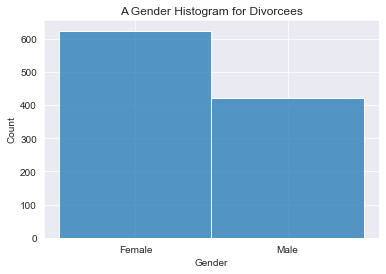

In [77]:
Divorcees=census[census["Marital Status"]=="Divorced"]
sns.histplot(Divorcees, x="Gender", binwidth=2)
plt.title("A Gender Histogram for Divorcees")

# Religion

Text(0.5, 1.0, 'A plot of Age Against Religion for Gender')

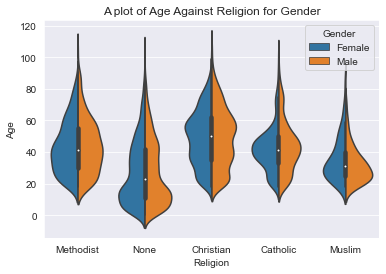

In [78]:
#A violin plot  Age against Religion condioned by gender
sns.violinplot(data=census, y= "Age", x= "Religion", hue="Gender", split=True)
plt.title("A plot of Age Against Religion for Gender")

Text(0.5, 1.0, 'A box plot of Religion Against Age')

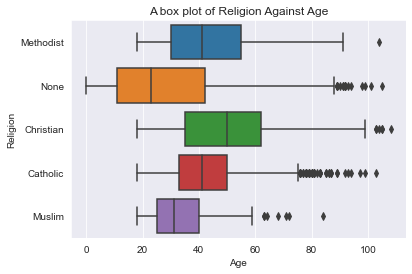

In [79]:
#A boxplot of Religion Against Age
sns.boxplot(data=census, y="Religion", x ="Age")
plt.title("A box plot of Religion Against Age")

Text(0.5, 1.0, 'A plot of Age against Religion')

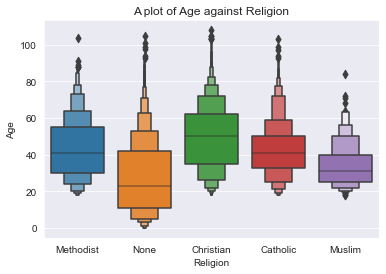

In [80]:
# A whiskerplot of Age against Religion
fig,axs=plt.figsize=(10,5)
whiskerplot=sns.boxenplot(y=census['Age'], x=census['Religion'])
whiskerplot.set(xlabel='Religion',ylabel='Age')
plt.title("A plot of Age against Religion")

# Infirmity rate

In [81]:
#To get the percentage of infirm people above 55 years in the population
infirmity_old_age=census[(census["Infirmity"]!="None") & (census["Age"]>55)].count()["Infirmity"]
infirmity_old_age_rate= (infirmity_old_age*100)/len(census)

#To get the percentage of infirm people above 55 years among those with infirmity in the population
Total_infirmity=census[census["Infirmity"]!="None"].count()["Infirmity"]
infirmity_old_age_percentage =(infirmity_old_age*100)/Total_infirmity

print("The percentage of old people with infirmity in the town is {}%".format(round(infirmity_old_age_rate,1)))
print("The percentage of old people among those with infirmity is {}%".format(round(infirmity_old_age_percentage,1)))

The percentage of old people with infirmity in the town is 0.1%
The percentage of old people among those with infirmity is 21.3%


Text(0.5, 1.0, 'Plot of Infirmity Against Age')

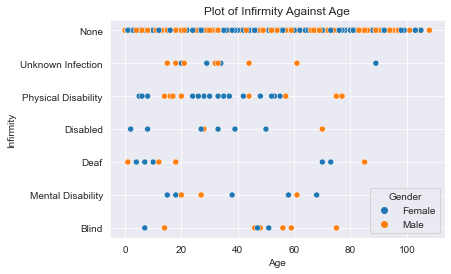

In [82]:
sns.scatterplot(data=census, x='Age', y='Infirmity', hue="Gender")
plt.title("Plot of Infirmity Against Age") #title

# Fertility rate

For fertility rate, the General fertility rate was used to estimate the fertility rate for the town. This is the total number of live births per 1000 women of child bearing age. 

The age specific fertility rates (ASFR) and Total fertility rates were also calculated below.

For this study, the age of women of child bearin age was set at 15-44 according to User guide to birth statistics(ONS 2021)



Calculating General fertility rate:

In [83]:
#To get the total number of children for particular ages
total_live_births0=census[census["Age"]==0].count()["Age"]
total_live_births4=census[census["Age"]==4].count()["Age"]
total_live_births8=census[census["Age"]==8].count()["Age"]
total_live_births12=census[census["Age"]==12].count()["Age"]
total_live_births16=census[census["Age"]==16].count()["Age"]
total_live_births20=census[census["Age"]==20].count()["Age"]

#To get the total number of women of child bearing age for present year and 4 years ago
total_women_child_bearing_age= census[(census["Gender"]=="Female") & (census["Age"]>=15) & (census["Age"]<=44)].count()["Gender"]
total_women_child_bearing_age_4yrs_ago=census[(census["Gender"]=="Female") & (census["Age"]>=19) & (census["Age"]<=48)].count()["Gender"]

#Calculating the general fertility rate for present year and 4 years ago
GFR = (total_live_births0* 1000)/total_women_child_bearing_age
GFR4yrs = (total_live_births4*1000)/total_women_child_bearing_age_4yrs_ago


print("The General Fertility rate of the town is {} per 1000 women".format((round(GFR))))
print ("The General Fertility rate of the town was {} per 1000 women 4years ago".format(round(GFR4yrs)))

The General Fertility rate of the town is 40 per 1000 women
The General Fertility rate of the town was 55 per 1000 women 4years ago


*Calculating ASFR and TFR*

In [84]:
#to get number of child bearing women in each specific age group
age_btw1519 = (census['Age'].between(15,19)) & (census['Gender'] == 'Female')
age_btw2024 = (census['Age'].between(20,24)) & (census['Gender'] == 'Female')
age_btw2529 = (census['Age'].between(25,29)) & (census['Gender'] == 'Female')
age_btw3034 = (census['Age'].between(30,34)) & (census['Gender'] == 'Female')
age_btw3539 = (census['Age'].between(35,39)) & (census['Gender'] == 'Female')
age_btw4044 = (census['Age'].between(40,44)) & (census['Gender'] == 'Female')


#calculatin the age specific fertility rate per thousand
asfr1519 = total_live_births0/len(census[age_btw1519])*1000
asfr2024 = total_live_births4/len(census[age_btw2024])*1000
asfr2529 = total_live_births8/len(census[age_btw2529])*1000
asfr3034 = total_live_births12/len(census[age_btw3034])*1000
asfr3539 = total_live_births16/len(census[age_btw3539])*1000
asfr4044 = total_live_births20/len(census[age_btw4044])*1000

#Total fertility rate is the sum of all the age specific fertility rate
TFR= (asfr1519+asfr2024+asfr2529+asfr3034+asfr3539+asfr4044)

print("ASFR 15-19 per 1000 is {}".format(asfr1519))
print("ASFR 20-24 per 1000 is {}".format(asfr2024))
print("ASFR 25-29 per 1000 is {}".format(asfr2529))
print("ASFR 30-34 per 1000 is {}".format(asfr3034))
print("ASFR 35-39 per 1000 is {}".format(asfr3539))
print("ASFR 40-44 per 1000 is {}".format(asfr4044))

print("The TFR per 1000 is {}".format(TFR))

ASFR 15-19 per 1000 is 245.57522123893804
ASFR 20-24 per 1000 is 341.5730337078652
ASFR 25-29 per 1000 is 401.4962593516209
ASFR 30-34 per 1000 is 401.3452914798206
ASFR 35-39 per 1000 is 328.92249527410206
ASFR 40-44 per 1000 is 383.9835728952772
The TFR per 1000 is 2102.895873947624


# Crude Birth rate
This is calculated by dividing the total number of live births in a year by the population per 1000. 

In [85]:
#to get the total number of children in the ages between 0-4 years
total_new_borns= census[census["Age"]==0].count()["Age"]
total_4yr_olds= census[census["Age"]==4].count()["Age"] 
total_3yr_olds= census[census["Age"]==3].count()["Age"] 
total_2yr_olds= census[census["Age"]==2].count()["Age"]
total_1yr_olds= census[census["Age"]==1].count()["Age"] 

#TO get the population of the town
total_population=census.count()["First Name"]

#Adjusting the population to what it would be 5yrs ago
total_children_born_in_5yrs=total_new_borns+total_1yr_olds+total_2yr_olds+total_3yr_olds+total_4yr_olds
total_population_5yrs_ago= total_population-total_children_born_in_5yrs

#Calculating crude birth rate 
crude_birth_rate= (total_new_borns/total_population)*1000
crude_birthrate_5yrsago= (total_4yr_olds/total_population_5yrs_ago)*1000
CBR_change= crude_birth_rate-crude_birthrate_5yrsago



print ("The crude birth rate is {} births per thousand".format(round(crude_birth_rate)))
print ("The crude birth rate 5 years ago was {} births per thousand".format(round(crude_birthrate_5yrsago)))
print ("The crude birth rate has dropped by {} per thousand from 5 years ago".format(round(CBR_change*-1)))

The crude birth rate is 10 births per thousand
The crude birth rate 5 years ago was 15 births per thousand
The crude birth rate has dropped by 5 per thousand from 5 years ago


# Crude Death Rate
This was calculated by dividing the total number of deaths in a year by the population per 1000

In [86]:
#To get the number of people in specific age ranges from 55 years old
age_56_to_60 = census[(census["Age"]>=56) & (census["Age"]<=60)].count()["Age"]
age_61_to_65 = census[(census["Age"]>=61) & (census["Age"]<=65)].count()["Age"]
age_66_to_70 = census[(census["Age"]>=66) & (census["Age"]<=70)].count()["Age"]
age_71_to_75 = census[(census["Age"]>=71) & (census["Age"]<=75)].count()["Age"]
age_76_to_80 = census[(census["Age"]>=76) & (census["Age"]<=80)].count()["Age"]
age_81_to_85 = census[(census["Age"]>=81) & (census["Age"]<=85)].count()["Age"]
age_86_to_90 = census[(census["Age"]>=86) & (census["Age"]<=90)].count()["Age"]
age_91_to_95 = census[(census["Age"]>=91) & (census["Age"]<=95)].count()["Age"]
age_96_to_100 = census[(census["Age"]>=96) & (census["Age"]<=100)].count()["Age"]
age_above_100 = census[census["Age"]>100].count()["Age"]

#Dividing the number of people in age ranges by 5 to get the number of people per annum in the specific age range
age_56_to_60_per_annum=age_56_to_60/5
age_61_to_65_per_annum =age_61_to_65/5
age_66_to_70_per_annum=age_66_to_70/5
age_71_to_75_per_annum=age_71_to_75/5
age_76_to_80_per_annum=age_76_to_80/5
age_81_to_85_per_annum=age_81_to_85/5
age_86_to_90_per_annum=age_86_to_90/5
age_91_to_95_per_annum=age_91_to_95/5
age_96_to_100_per_annum=age_96_to_100/5
age_above_100_per_annum=age_above_100/8

#to get the difference in number of people from from age range to another as death rate
cdr_56_65= ((age_56_to_60_per_annum-age_61_to_65_per_annum)/total_population)*1000
cdr_66_75= ((age_66_to_70_per_annum-age_71_to_75_per_annum)/total_population)*1000
cdr_76_85= ((age_76_to_80_per_annum-age_81_to_85_per_annum)/total_population)*1000
cdr_86_95= ((age_86_to_90_per_annum-age_91_to_95_per_annum)/total_population)*1000
cdr_96_abv100= ((age_96_to_100_per_annum-age_above_100_per_annum)/total_population)*1000

crude_death_rate= cdr_56_65+cdr_66_75+cdr_76_85+cdr_86_95+cdr_96_abv100

print("The crude death rate is {} deaths per thousand".format(round(crude_death_rate)))

The crude death rate is 6 deaths per thousand


# Crude Growth rate

In [87]:
CGR= round(crude_birth_rate) - round(crude_death_rate)
print("The Crude growth rate is {}".format(CGR))
print("The Crude growth rate is {} percent".format(CGR/10))

The Crude growth rate is 4
The Crude growth rate is 0.4 percent


# Migration
For this project, the rate of Immigration was taken as those lodging in the town while emigrants was taken as difference between male and female divorcees.

In [88]:
#Estimating the number of lodgers who are not students
census[census["Occupation"]=="University Student"].count()["Occupation"]
immigrants=census[(census["Relationship to Head of House"]=="Lodger") & (census["Occupation"]!="University Student") & (census["Occupation"]!="PhD Student")].count()["Occupation"]

#Getting the number of  male and female divorcees
no_of_male_divorced=census[(census["Marital Status"]=="Divorced") & (census["Gender"]=="Male")].count()["Gender"]
no_of_female_divorced=census[(census["Marital Status"]=="Divorced") & (census["Gender"]=="Female")].count()["Gender"]

#to get the immigration and emigration rate
immigration_rate = (immigrants/total_population)*1000
emigration_rate=((no_of_female_divorced-no_of_male_divorced)/total_population)*1000

print("The total number of immigrants is {} per thousand".format(round(immigration_rate)))
print("The total number of Emmigrants is {} per thousand".format(round(emigration_rate)))

The total number of immigrants is 34 per thousand
The total number of Emmigrants is 18 per thousand


# Population Growth

In [89]:
print("The population growth is by {}".format(((crude_birth_rate+immigration_rate)-(crude_death_rate+emigration_rate))/10))

The population growth is by 1.9486418420579241


# Occupancy

In [90]:
#groups the data by house number and street and assigns to new column number of same house number in a street
houseoccupancy = census.groupby(['House Number', 'Street']).size().reset_index(name='Occupancy Count')
print(len(houseoccupancy))
print(houseoccupancy.head())

3747
  House Number            Street  Occupancy Count
0            1       Acorn Delve                5
1            1    Albanspay Road                1
2            1  Anglia Mountains                1
3            1   Armaghfast Lane                2
4            1    Beaver Factory                8


In [91]:
#to create a column stating number of occupants in a house
group_census = census.groupby(['House Number', 'Street']).groups
df_census = census.copy()
df_census['Occupancy'] = ''
for k, v in group_census.items():
    df_census.loc[v,'Occupancy'] = len(v)
df_census

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,AgeGroup,Employment,Occupancy
0,1,Renaissance Lane,Grace,Johnston,29,Head,Single,Female,Visual merchandiser,None,Methodist,25-29,Employed,4
1,1,Renaissance Lane,Brett,Sheppard,31,Partner,Single,Male,Biomedical engineer,None,Methodist,30-34,Employed,4
2,1,Renaissance Lane,Mark,Johnston,6,Son,Never Married,Male,Student,None,None,5-9,Student(Child),4
3,1,Renaissance Lane,Teresa,Johnston,3,Daughter,Never Married,Female,Child,None,None,0-4,Student(Child),4
4,2,Renaissance Lane,Helen,Smith,81,Head,Married,Female,Retired Primary school teacher,None,Christian,80-84,Retired,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11113,1,Racoon Hall,Tracey,Gregory,12,Granddaughter,Never Married,Female,Student,None,None,10-14,Student(Child),7
11114,1,Racoon Hall,Nigel,Macdonald,8,Grandson,Never Married,Male,Student,None,None,5-9,Student(Child),7
11115,1,Racoon Hall,Natalie,Francis,1,Granddaughter,Never Married,Female,Child,None,None,0-4,Student(Child),7
11116,1,Racoon Hall,Roger,Leach,54,Lodger,Single,Male,Commercial horticulturist,None,Methodist,50-54,Employed,7


In [92]:
#to determine the mode occupancy per street

streets = df_census['Street'].unique()
street_mode = []
for street in streets:
    street_mode.append(stat.mode(list(df_census[df_census['Street']==street]['Occupancy'])))
ndf_census = pd.DataFrame({
    'Street': streets,
    'Mode': street_mode
})
ndf_census.head()

,Street,Mode
0,Renaissance Lane,3
1,Owen Inlet,2
2,Price Prairie,5
3,Winchester Road,5
4,Hope Trace,1
